In [141]:
import numpy as np
import pandas as pd

In [143]:
dataset = pd.read_csv("heart_disease (1).csv")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [109]:
for feature in dataset.columns:
    print(dataset[feature].describe)
    print(dataset[feature].dtype)


<bound method NDFrame.describe of 0       52
1       53
2       70
3       61
4       62
        ..
1020    59
1021    60
1022    47
1023    50
1024    54
Name: age, Length: 1025, dtype: int64>
int64
<bound method NDFrame.describe of 0       1
1       1
2       1
3       1
4       0
       ..
1020    1
1021    1
1022    1
1023    0
1024    1
Name: sex, Length: 1025, dtype: int64>
int64
<bound method NDFrame.describe of 0      -0.378869
1       0.528894
2       0.831481
3       1.013034
4       0.407859
          ...   
1020    0.528894
1021   -0.378869
1022   -1.286632
1023   -1.286632
1024   -0.681457
Name: trestbps, Length: 1025, dtype: float64>
float64
<bound method NDFrame.describe of 0      -0.691104
1      -0.879693
2      -1.487368
3      -0.879693
4       1.027150
          ...   
1020   -0.502515
1021    0.272795
1022    0.629018
1023    0.188977
1024   -1.194008
Name: chol, Length: 1025, dtype: float64>
float64
<bound method NDFrame.describe of 0       0
1       1
2       0
3

In [110]:
for feature in dataset.columns:
    print(dataset[feature].isna().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [111]:
features = [feature for feature in dataset.columns]
features

['age',
 'sex',
 'trestbps',
 'chol',
 'fbs',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'target',
 'cp_1',
 'cp_2',
 'cp_3',
 'restecg_1',
 'restecg_2',
 'thal_1',
 'thal_2',
 'thal_3']

In [113]:
discrete_features = [feature for feature in features if len(dataset[feature].unique()) <25 ]
print(len(discrete_features))

## here dicrete features are encoded categorical features
print("discrete features/encoded categorical features",discrete_features)
continuous_features = [feature for feature in features if feature not in discrete_features ]
print(len(continuous_features))
print("continuous features ",continuous_features)





14
discrete features/encoded categorical features ['sex', 'fbs', 'exang', 'slope', 'ca', 'target', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'thal_1', 'thal_2', 'thal_3']
5
continuous features  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


### distribuion of categorical features

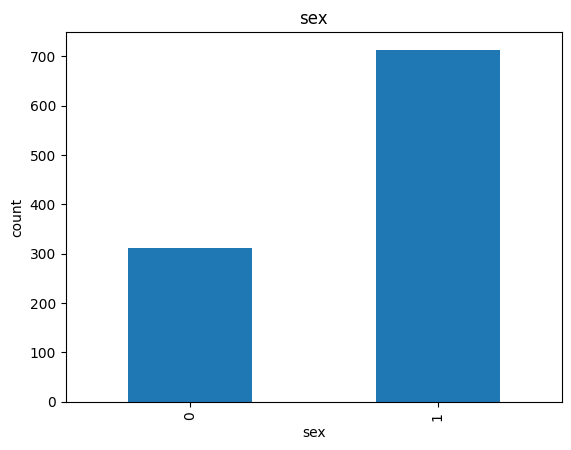

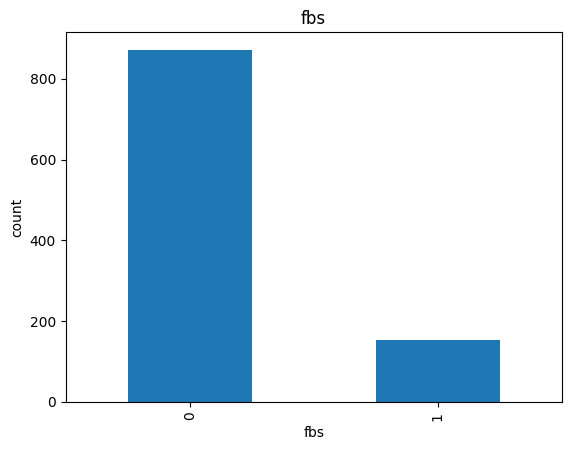

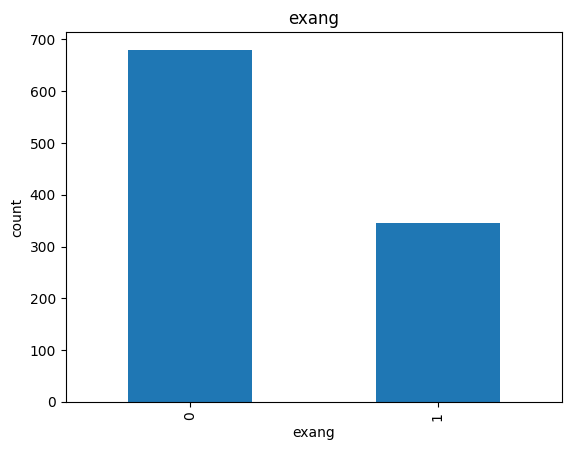

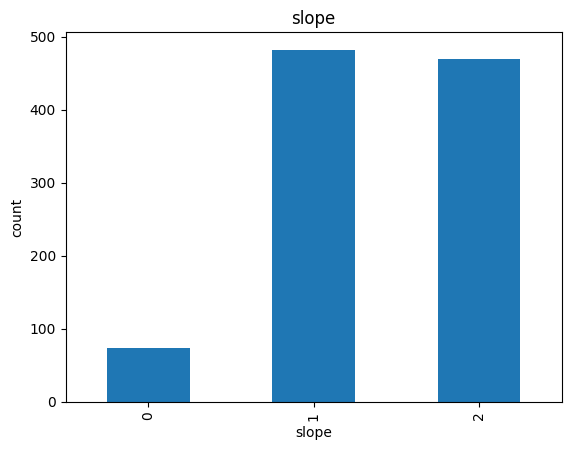

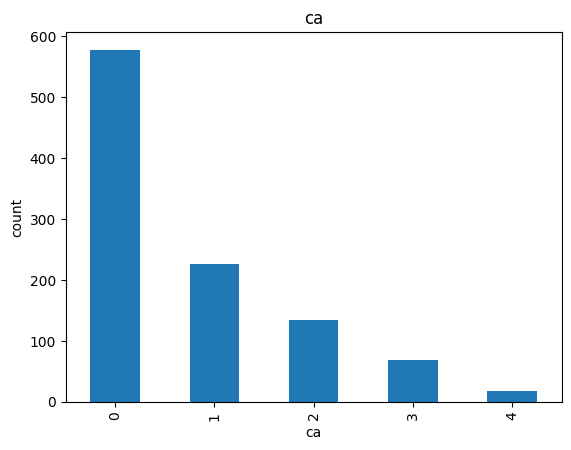

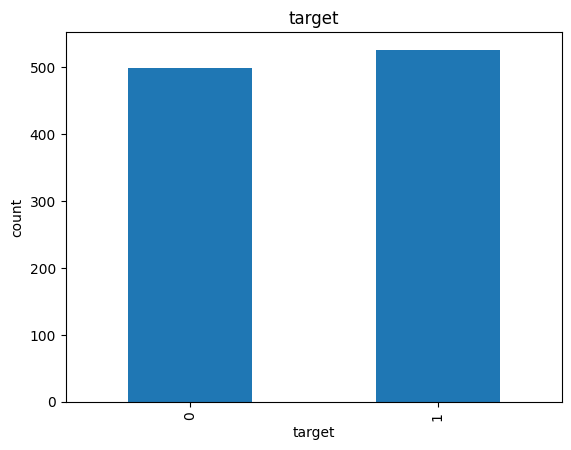

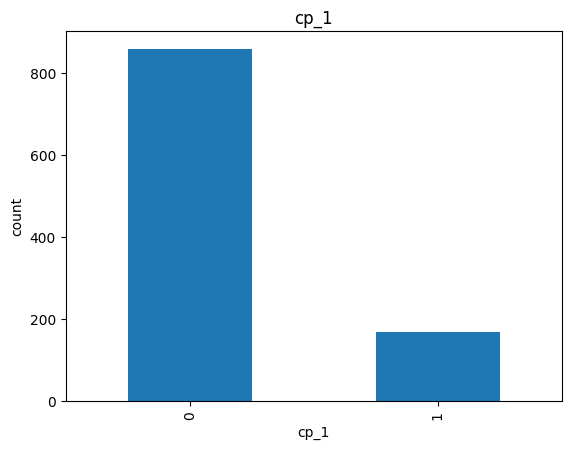

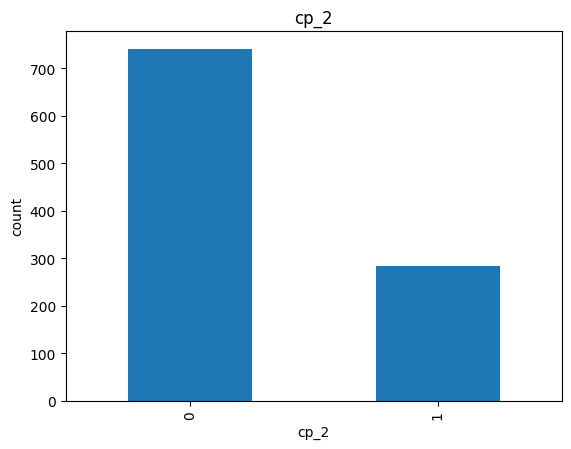

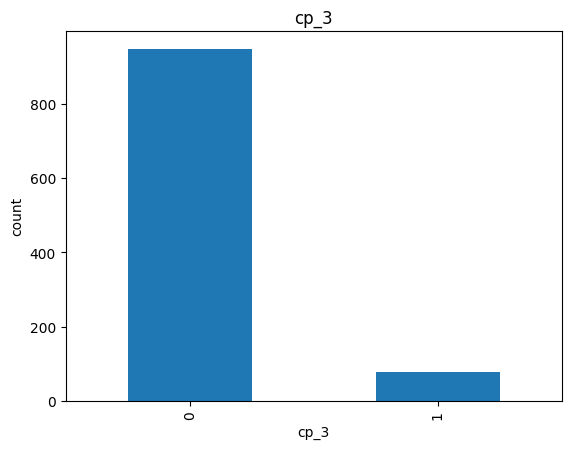

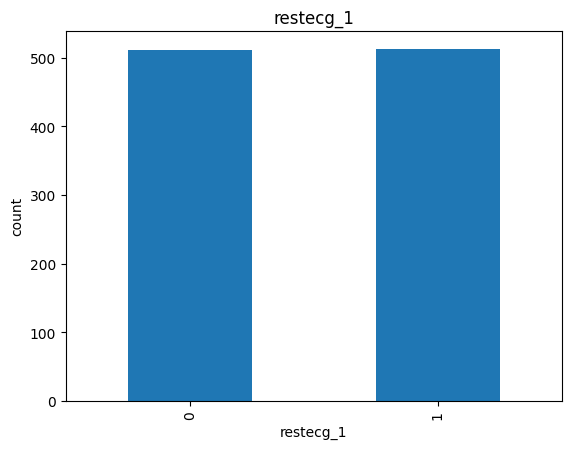

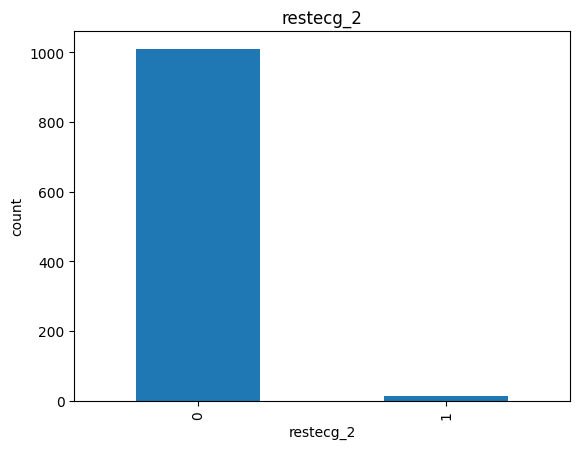

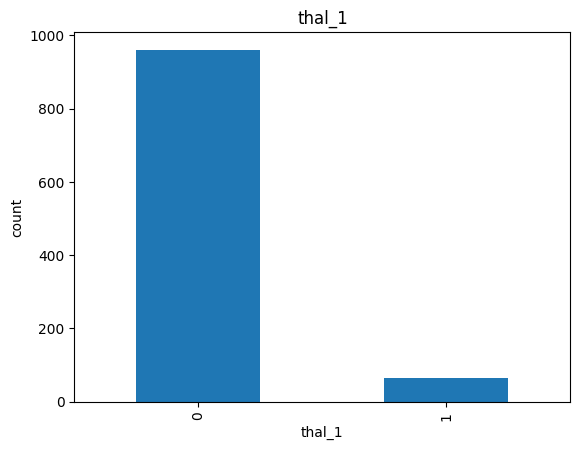

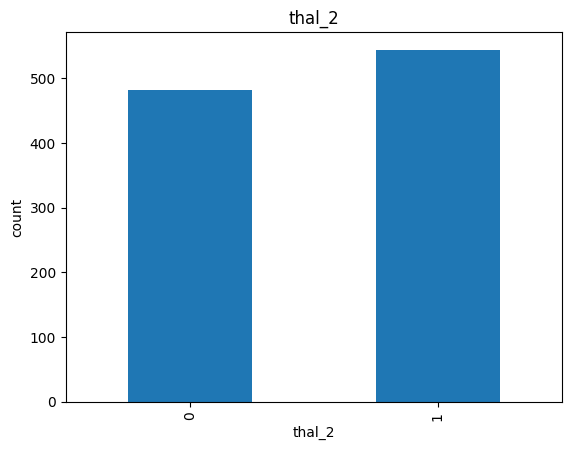

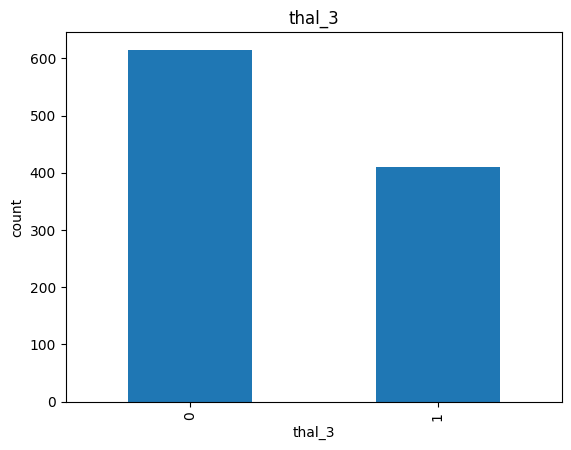

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
# distribution of categorical features
for feature in discrete_features:
    data = dataset.copy()
    data.groupby(feature)['target'].count().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()


### distribution of numerical features

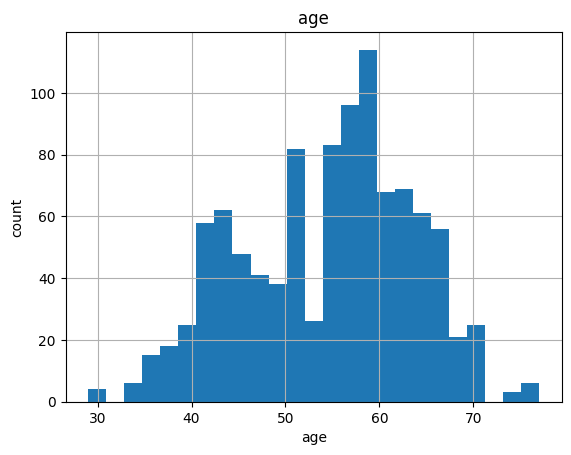

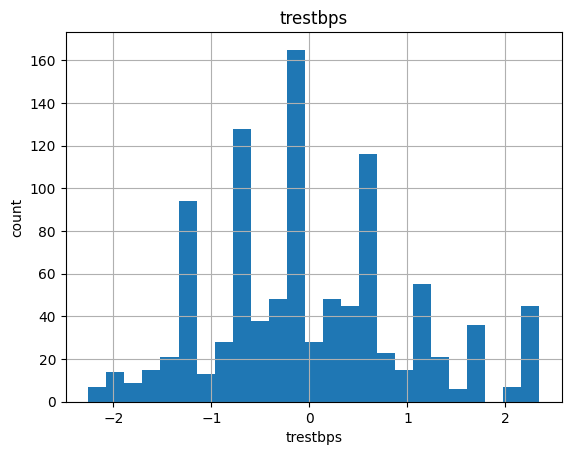

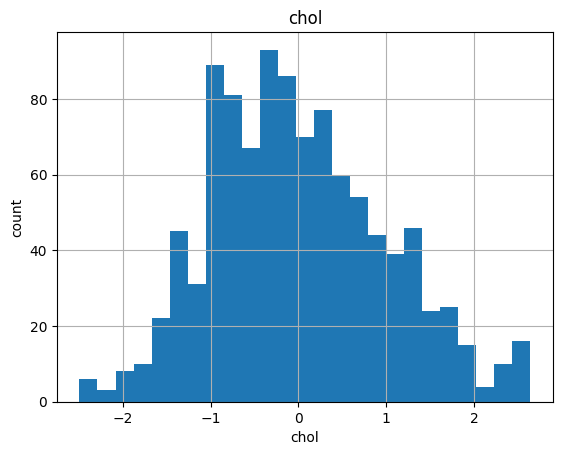

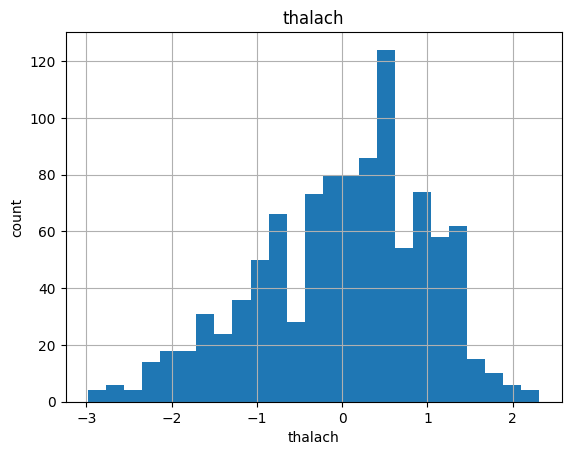

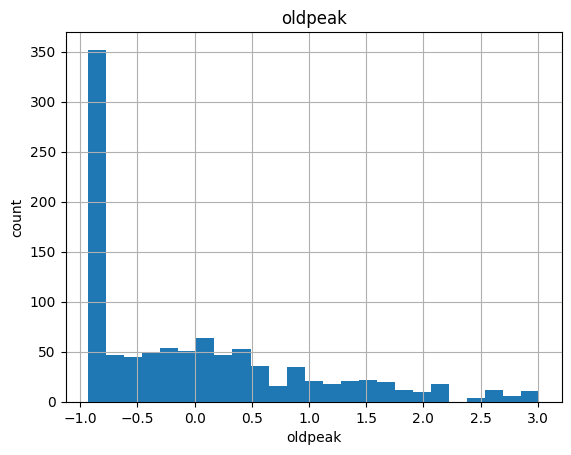

In [115]:
for feature in continuous_features:
    data = dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

### Handling outliers

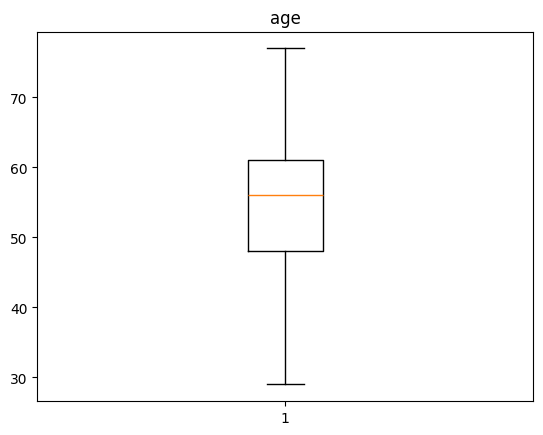

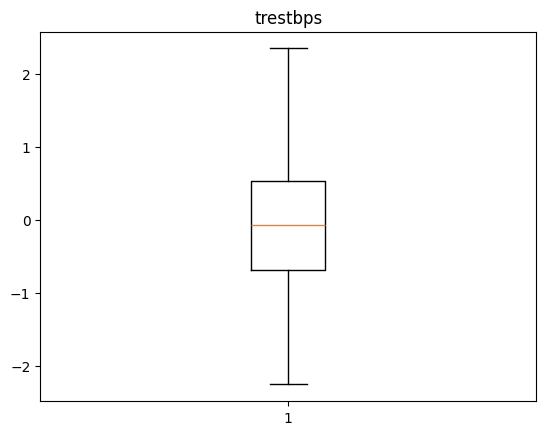

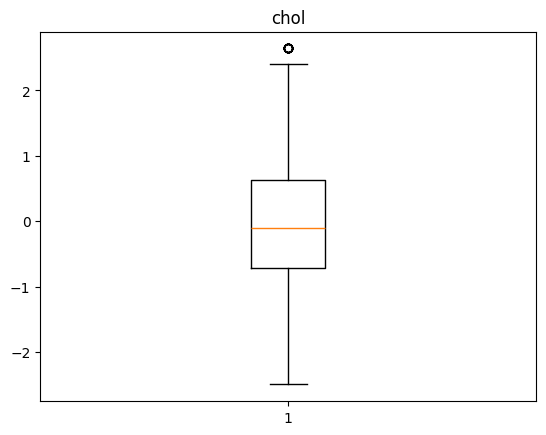

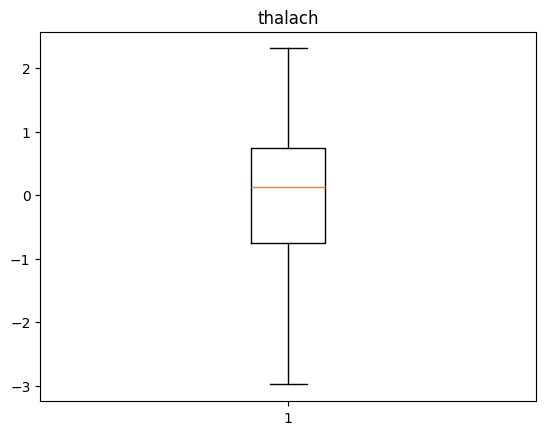

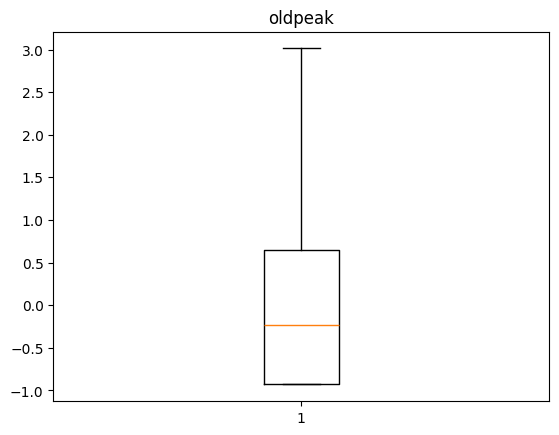

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
for feature in continuous_features:
    plt.boxplot(dataset[feature])
    plt.title(feature)
    plt.show()


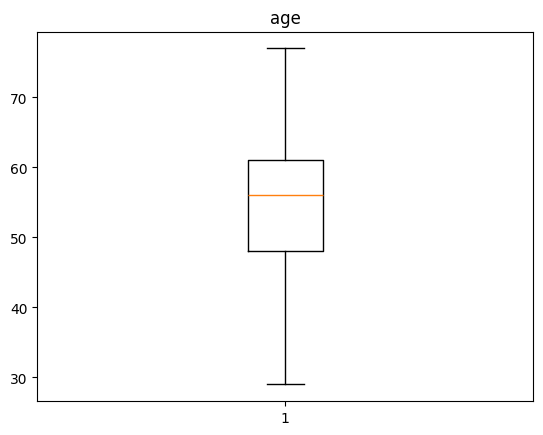

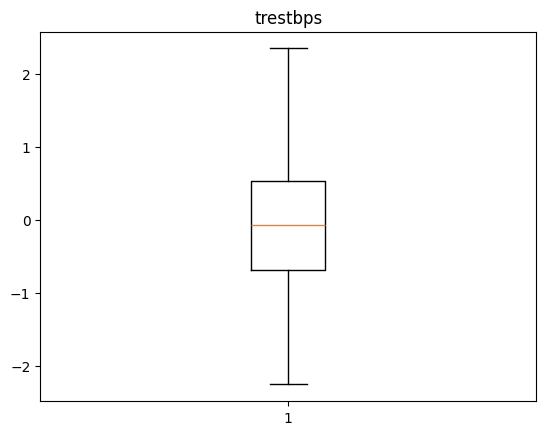

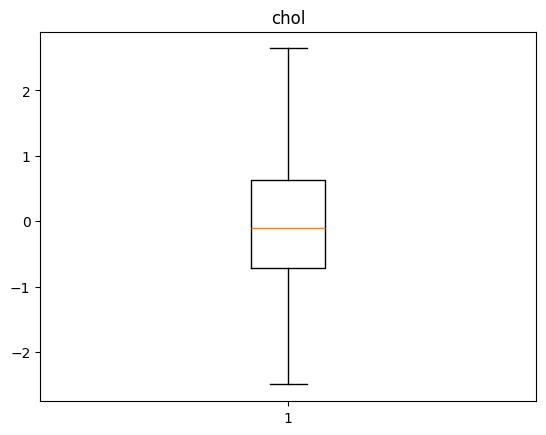

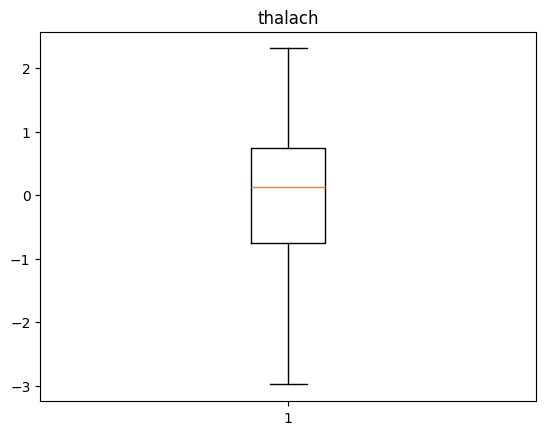

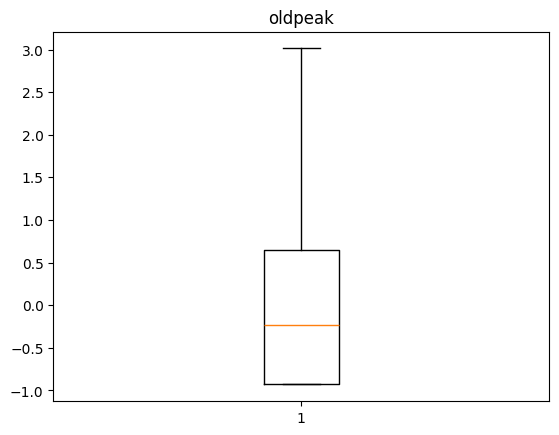

In [117]:
def remove_outliers(data,feature):
    q1 = dataset[feature].quantile(0.25)
    q3 = dataset[feature].quantile(0.75)
    iqr = q3 - q1
    UB = q3 + 1.5*iqr
    LB = q1 - 1.5*iqr
    dataset[feature] = dataset[feature].clip(upper = UB,lower = LB)
    return dataset[feature]

for feature in continuous_features:
    remove_outliers(dataset,feature)

for feature in continuous_features:
    plt.boxplot(dataset[feature])
    plt.title(feature)
    plt.show()


### Encoding Categorical features

In [ ]:
multi_cat_features = ['cp', 'restecg','thal']
dataset = pd.get_dummies(dataset,columns=multi_cat_features,drop_first=True,dtype=int)
dataset

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,52,1,-0.378869,-0.691104,0,0.824084,0,-0.054537,2,2,0,0,0,0,1,0,0,0,1
1,53,1,0.528894,-0.879693,1,0.255654,1,1.785457,0,0,0,0,0,0,0,0,0,0,1
2,70,1,0.831481,-1.487368,0,-1.056105,1,1.347363,0,0,0,0,0,0,1,0,0,0,1
3,61,1,1.013034,-0.879693,0,0.518006,0,-0.930725,2,1,0,0,0,0,1,0,0,0,1
4,62,0,0.407859,1.027150,1,-1.886886,0,0.734031,1,3,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,0.528894,-0.502515,0,0.649182,1,-0.930725,2,0,1,1,0,0,1,0,0,1,0
1021,60,1,-0.378869,0.272795,0,-0.356500,1,1.522600,1,1,0,0,0,0,0,0,0,0,1
1022,47,1,-1.286632,0.629018,0,-1.362182,1,-0.054537,1,1,0,0,0,0,0,0,0,1,0
1023,50,0,-1.286632,0.188977,0,0.430556,0,-0.930725,2,0,1,0,0,0,0,0,0,1,0


### Scaling

In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_features = ['trestbps', 'chol', 'thalach', 'oldpeak']
for feature in scale_features:
    dataset[feature] = scaler.fit_transform(dataset[[feature]])




In [121]:
dataset

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,52,1,-0.378869,-0.691104,0,0.824084,0,-0.054537,2,2,0,0,0,0,1,0,0,0,1
1,53,1,0.528894,-0.879693,1,0.255654,1,1.785457,0,0,0,0,0,0,0,0,0,0,1
2,70,1,0.831481,-1.487368,0,-1.056105,1,1.347363,0,0,0,0,0,0,1,0,0,0,1
3,61,1,1.013034,-0.879693,0,0.518006,0,-0.930725,2,1,0,0,0,0,1,0,0,0,1
4,62,0,0.407859,1.027150,1,-1.886886,0,0.734031,1,3,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,0.528894,-0.502515,0,0.649182,1,-0.930725,2,0,1,1,0,0,1,0,0,1,0
1021,60,1,-0.378869,0.272795,0,-0.356500,1,1.522600,1,1,0,0,0,0,0,0,0,0,1
1022,47,1,-1.286632,0.629018,0,-1.362182,1,-0.054537,1,1,0,0,0,0,0,0,0,1,0
1023,50,0,-1.286632,0.188977,0,0.430556,0,-0.930725,2,0,1,0,0,0,0,0,0,1,0


### train test split

In [122]:
from sklearn.model_selection import train_test_split
# for classsification
Xc= dataset.drop('target',axis = 1)
yc= dataset['target']
X_train_cls,X_test_cls,y_train_cls,y_test_cls = train_test_split(Xc,yc,test_size=0.2,random_state=42,stratify=yc)

#for regression
Xr = dataset.drop(['target','chol'],axis = 1)
yr = dataset['chol']
X_train_reg,X_test_reg,y_train_reg,y_test_reg = train_test_split(Xr,yr,test_size=0.2,random_state=42)


### Regression Task

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
svr =  SVR(kernel='linear')
rfr = RandomForestRegressor(n_estimators=100,max_depth=5,random_state=42)

lr.fit(X_train_reg,y_train_reg)
svr.fit(X_train_reg,y_train_reg)
rfr.fit(X_train_reg,y_train_reg)


y_pred_lr = lr.predict(X_test_reg)
y_pred_svr = svr.predict(X_test_reg)
y_pred_rfr = rfr.predict(X_test_reg)



### performance metrics for regression

In [134]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
MAE_lr = mean_absolute_error(y_test_reg,y_pred_lr)
MSE_lr = mean_squared_error(y_test_reg,y_pred_lr)
r2_lr = r2_score(y_test_reg,y_pred_lr)

MAE_svr = mean_absolute_error(y_test_reg,y_pred_svr)
MSE_svr = mean_squared_error(y_test_reg,y_pred_svr)
r2_svr = r2_score(y_test_reg,y_pred_svr)

MAE_rfr = mean_absolute_error(y_test_reg,y_pred_rfr)
MSE_rfr = mean_squared_error(y_test_reg,y_pred_rfr)
r2_rfr= r2_score(y_test_reg,y_pred_rfr)


### table of performance metrics for regression

In [135]:
reg_df = pd.DataFrame(columns=['Model','MAE','MSE','R2_score'])
reg_df.loc[len(reg_df)] = ['Linear regression',MAE_lr,MSE_lr,r2_lr]
reg_df.loc[len(reg_df)] = ['SVR',MAE_svr,MSE_svr,r2_svr]
reg_df.loc[len(reg_df)] = ['RF regressor',MAE_rfr,MSE_rfr,r2_rfr]
reg_df

,Model,MAE,MSE,R2_score
0,Linear regression,0.784618,0.986950,0.070999
1,SVR,0.805807,1.046380,0.015059
2,RF regressor,0.640022,0.620616,0.415823


### Classification Task

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

log = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=42)


log.fit(X_train_cls,y_train_cls)
knn.fit(X_train_cls,y_train_cls)
rfc.fit(X_train_cls,y_train_cls)

y_pred_log = log.predict(X_test_cls)
y_pred_knn = knn.predict(X_test_cls)
y_pred_rfc = rfc.predict(X_test_cls)

### performance metrics for Classification

In [128]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc_log = accuracy_score(y_test_cls,y_pred_log)
pre_log = precision_score(y_test_cls,y_pred_log)
rec_log = recall_score(y_test_cls,y_pred_log)
f1_log = f1_score(y_test_cls,y_pred_log)


acc_knn = accuracy_score(y_test_cls,y_pred_knn)
pre_knn = precision_score(y_test_cls,y_pred_knn)
rec_knn = recall_score(y_test_cls,y_pred_knn)
f1_knn = f1_score(y_test_cls,y_pred_knn)


acc_rfc = accuracy_score(y_test_cls,y_pred_rfc)
pre_rfc = precision_score(y_test_cls,y_pred_rfc)
rec_rfc = recall_score(y_test_cls,y_pred_rfc)
f1_rfc = f1_score(y_test_cls,y_pred_rfc)

### Table of performance metrics for Classification

In [129]:
cls_df = pd.DataFrame(columns=['Model','Accuracy','Precision','recall','F1_score'])
cls_df.loc[len(cls_df)] = ['Logistic regression',acc_log,pre_log,rec_log,f1_log]
cls_df.loc[len(cls_df)] = ['KNN',acc_knn,pre_knn,rec_knn,f1_knn]
cls_df.loc[len(cls_df)] = ['Random Forest Classifier',acc_rfc,pre_rfc,rec_rfc,f1_rfc]
cls_df


,Model,Accuracy,Precision,recall,F1_score
0,Logistic regression,0.848780,0.813559,0.914286,0.860987
1,KNN,0.917073,0.915094,0.923810,0.919431
2,Random Forest Classifier,0.887805,0.866071,0.923810,0.894009


In [132]:
print("Best Regression Model is Random forest Regressor because it has low MAE,MSE and high R2_score")
print("Best Classifier model is KNN classifier because it has high  precision,recall,accuracy and F1_score")

Best Regression Model is Random forest Regressor because it has low MAE,MSE and high R2_score
Best Classifier model is KNN classifier because it has high  precision,recall,accuracy and F1_score


### Custom linear regression for multidimensional data



$$ \text{Loss} = \frac{1}{N} \sum_{i=1}^{N} (y_i - (mx_i + c))^2 $$
![Gradient Derivation](derivation.jpg)


In [139]:
import numpy as np
class lin_reg:
    def __init__(self):
        self.coef = None
        self.intercept = 0
        self.loss_curve = []
    
    def fit(self,X,y,lr = 0.01,n_iter = 1000):
        n_samples,n_features = X.shape
        X = np.array(X)
        y = np.array(y).reshape(-1,1)
        
        self.coef = np.zeros((n_features,1))
        self.intercept = 0

        for _ in  range(n_iter):
            y_pred = np.dot(X,self.coef) + self.intercept

            error = y - y_pred

            dw = (-2/n_samples) * np.dot(X.T,error)
            db = (-2/n_samples) * np.sum(error)

            self.coef -= lr*dw
            self.intercept -= lr*db

            loss = (1/n_samples)*np.sum(error**2)
            self.loss_curve.append(loss)

    def predict(self,X):
        return np.dot(X,self.coef) +self.intercept
    def fit_transform(self,X,y,lr = 0.01,n_iter = 1000):
        self.fit(X,y,lr,n_iter)
        return self.predict(X)



In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Sample dataset
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])

my_model = lin_reg()
my_model.fit(X, y, lr=0.01, n_iter=1000)
y_pred_custom = my_model.predict(X)

sk_model = LinearRegression()
sk_model.fit(X, y)
y_pred_sklearn = sk_model.predict(X)    


print("Custom Coef:", my_model.coef.flatten(), "Intercept:", my_model.intercept)
print("Sklearn Coef:", sk_model.coef_, "Intercept:", sk_model.intercept_)
print("Custom Predictions:", y_pred_custom.flatten())
print("Sklearn Predictions:", y_pred_sklearn)


Custom Coef: [1.99518035] Intercept: 0.017400463340610635
Sklearn Coef: [2.] Intercept: 0.0
Custom Predictions: [2.01258081 4.00776116 6.00294152 7.99812187 9.99330222]
Sklearn Predictions: [ 2.  4.  6.  8. 10.]
